In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
import time
import networkx as nx
import matplotlib.pyplot as plt
# from rl4co.models.zoo.l2d import L2DModel
# from rl4co.models.zoo.l2d.policy import L2DPolicy
# from rl4co.models.zoo.l2d.decoder import L2DDecoder
# from rl4co.models.nn.graph.hgnn import HetGNNEncoder
# from rl4co.utils.trainer import RL4COTrainer
from rl4co.envs import HRCEnv
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec


c:\Users\jia\AppData\Local\anaconda3\envs\rlhrc\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
params_H3R1 = {
  "num_jobs": 15, 
  "num_humans": 3, 
  "num_robots": 1, 
  "min_ops_per_job": 1,  
  "max_ops_per_job": 3,  
  "min_processing_time": 8, 
  "max_processing_time": 233,  
  "min_eligible_oper_per_op": 1, 
  "max_eligible_oper_per_op": 4, 
  "file_path": r"C:\Users\jia\Desktop\hrcscheduling\examples_for_hrc\test_data\dataset\H3R1"
}

params_H4R1 = {
  "num_jobs": 15, 
  "num_humans": 4, 
  "num_robots": 1, 
  "min_ops_per_job": 1,  
  "max_ops_per_job": 3,  
  "min_processing_time": 8, 
  "max_processing_time": 233,  
  "min_eligible_oper_per_op": 1, 
  "max_eligible_oper_per_op": 5, 
  "file_path": r"C:\Users\jia\Desktop\hrcscheduling\examples_for_hrc\test_data\dataset\H4R1"
}

params_H5R1 = {
  "num_jobs": 15, 
  "num_humans": 5, 
  "num_robots": 1, 
  "min_ops_per_job": 1,  
  "max_ops_per_job": 3,  
  "min_processing_time": 8, 
  "max_processing_time": 233,  
  "min_eligible_oper_per_op": 1, 
  "max_eligible_oper_per_op": 6, 
  "file_path": r"C:\Users\jia\Desktop\hrcscheduling\examples_for_hrc\test_data\dataset\H5R1"
}

params_H5R2 = {
  "num_jobs": 15, 
  "num_humans": 5, 
  "num_robots": 2, 
  "min_ops_per_job": 1,  
  "max_ops_per_job": 3,  
  "min_processing_time": 8, 
  "max_processing_time": 233,  
  "min_eligible_oper_per_op": 1, 
  "max_eligible_oper_per_op": 7, 
  "file_path": r"C:\Users\jia\Desktop\hrcscheduling\examples_for_hrc\test_data\dataset\H5R2"
}

In [3]:
def make_step_with_model(td, env, model):
    hidden, init_embeds = model.policy.encoder(td)
    logits, mask = model.policy.decoder(td, hidden, num_starts=1)
    # num_starts: Use 100 starting points for sampling. Due to different starting points, the possible log values ​​are also different.
    action = torch.sum(logits, dim=0).masked_fill(~mask, -torch.inf).argmax(1)
    td["action"] = action
    td = env.step(td)["next"]
    return td

Found 7 unused kwargs: {'num_jobs': 15, 'min_ops_per_job': 1, 'max_ops_per_job': 3, 'min_processing_time': 8, 'max_processing_time': 233, 'min_eligible_oper_per_op': 1, 'max_eligible_oper_per_op': 4}
C:\Users\jia\AppData\Local\Temp\ipykernel_2764\1083573519.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case whe

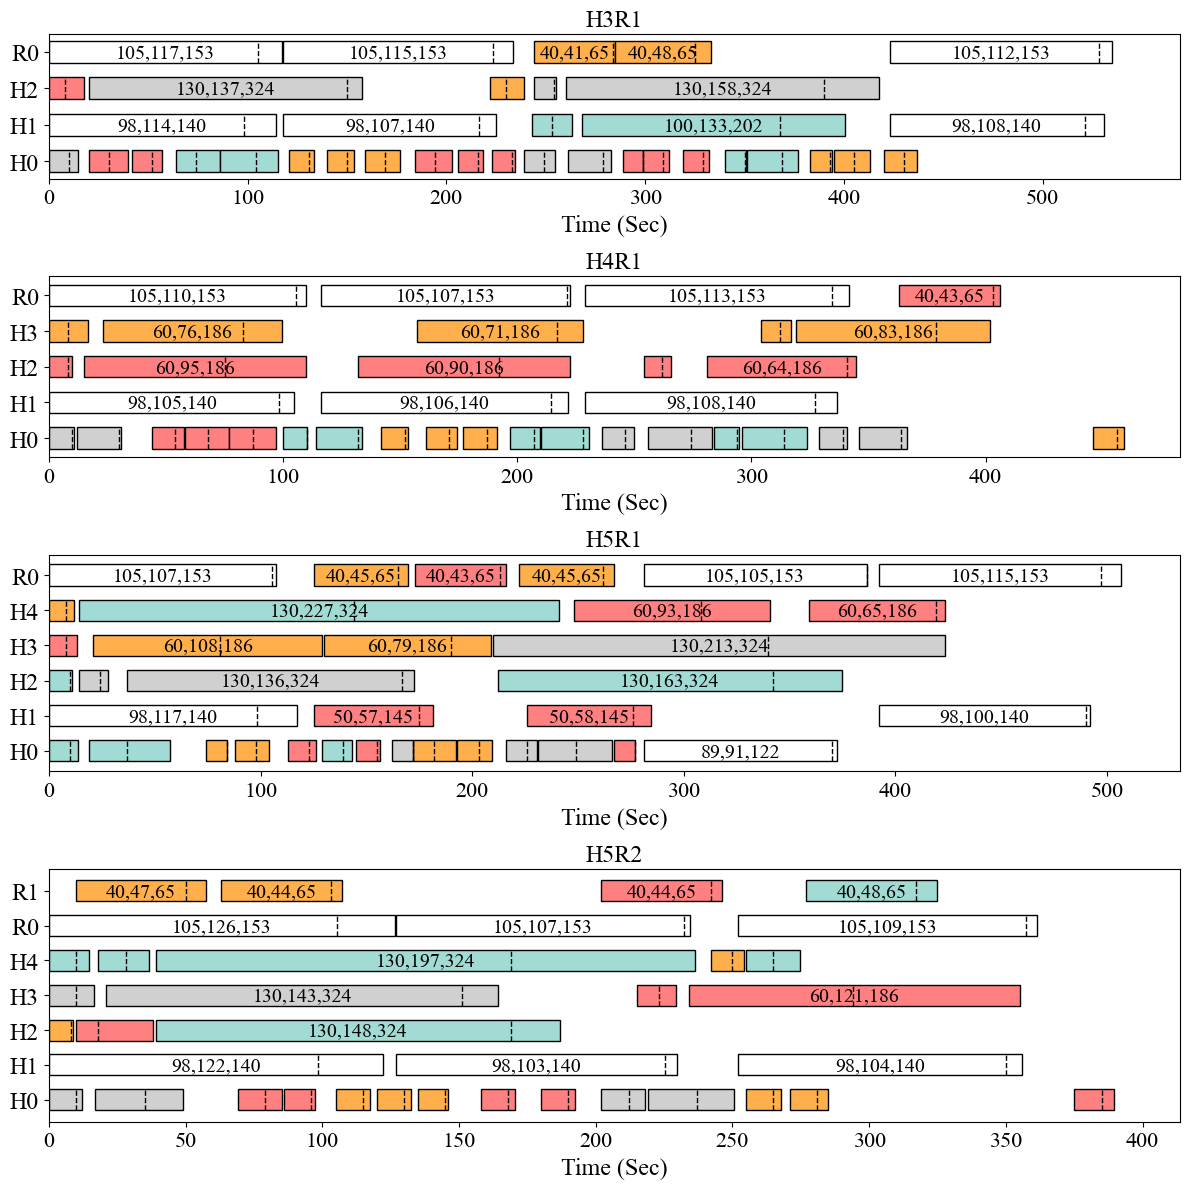

In [4]:
env_H3R1 = HRCEnv(generator_params=params_H3R1)
td_H3R1 = env_H3R1.reset(batch_size=[20])
model_H3R1 = torch.load("C:\\Users\\jia\\Desktop\\hrcscheduling\\examples_for_hrc\\models\\L2DModel_H3R1.pth", map_location=torch.device('cpu'))
model_H3R1.eval()

env_H4R1 = HRCEnv(generator_params=params_H4R1)
td_H4R1 = env_H4R1.reset(batch_size=[20])
model_H4R1 = torch.load("C:\\Users\\jia\\Desktop\\hrcscheduling\\examples_for_hrc\\models\\L2DModel_H4R1.pth", map_location=torch.device('cpu'))
model_H4R1.eval()

env_H5R1 = HRCEnv(generator_params=params_H5R1)
td_H5R1 = env_H5R1.reset(batch_size=[20])
model_H5R1 = torch.load("C:\\Users\\jia\\Desktop\\hrcscheduling\\examples_for_hrc\\models\\L2DModel_H5R1.pth", map_location=torch.device('cpu'))
model_H5R1.eval()

env_H5R2 = HRCEnv(generator_params=params_H5R2)
td_H5R2 = env_H5R2.reset(batch_size=[20])
model_H5R2 = torch.load("C:\\Users\\jia\\Desktop\\hrcscheduling\\examples_for_hrc\\models\\L2DModel_H5R2.pth", map_location=torch.device('cpu'))
model_H5R2.eval()

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
# Update plot within a for loop
height_ratios = [4, 5, 6, 7]
fig, axs = plt.subplots(4, 1, figsize=(12, 12), gridspec_kw={'height_ratios': height_ratios})

while not td_H3R1["done"].all():
    # Clear the previous output for the next iteration
    td_H3R1 = make_step_with_model(td_H3R1, env_H3R1, model_H3R1)
env_H3R1.render(td_H3R1, 0, axs[0])
while not td_H4R1["done"].all():
    td_H4R1 = make_step_with_model(td_H4R1, env_H4R1, model_H4R1)
env_H4R1.render(td_H4R1, 0, axs[1])
while not td_H5R1["done"].all():
    td_H5R1 = make_step_with_model(td_H5R1, env_H5R1, model_H5R1)
env_H5R1.render(td_H5R1, 1, axs[2])
while not td_H5R2["done"].all():
    td_H5R2 = make_step_with_model(td_H5R2, env_H5R2, model_H5R2)
env_H5R2.render(td_H5R2, 1, axs[3])

# Add a legend for class labels
# colors = plt.cm.tab10(np.linspace(0, 1, 5))
colors = ['#FF8080', '#FFB04D', '#A1DBD3', '#D0D0D0', '#FFFFFF']
cmap = ListedColormap(colors)
handles = [plt.Rectangle((0, 0), 1, 1, color=cmap(i)) for i in range(5)]
# fig.legend(
#     handles,
#     [f"Task {label+1}" for label in range(5)],
#     loc="upper center",
#     bbox_to_anchor=(0.5, 1.05),
#     fontsize='xx-large',
#     ncol=5,  # 横向排布图例
# )


# Display updated plot
plt.tight_layout()
fig.savefig("C:\\Users\\jia\\Desktop\\plot\\gantt.tif", dpi=300, bbox_inches='tight')
plt.show()


H3R1

c:\Users\jia\AppData\Local\anaconda3\envs\rlhrc\Lib\site-packages\matplotlib\axes\_axes.py:2316: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  dx = [convert(x0 + ddx) - x for ddx in dx]


<Figure size 640x480 with 0 Axes>

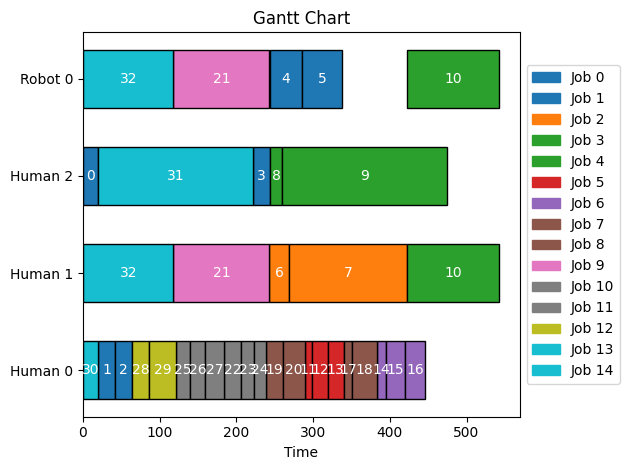

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
env = HRCEnv(generator_params=params_H3R1)
td = env.reset(batch_size=[20])
model = torch.load("C:\\Users\\jia\\Desktop\\hrcscheduling\\examples_for_hrc\\models\\L2DModel_H3R1.pth", map_location=torch.device('cpu'))
model.eval()
env.render(td, 1)
# Update plot within a for loop
while not td["done"].all():
    # Clear the previous output for the next iteration
    clear_output(wait=True)

    td = make_step_with_model(td, env, model)
    schedule = env.render(td, 0)
    # Display updated plot
    display(plt.gcf())
    
    # Pause for a moment to see the changes
    # time.sleep(.4)

H5R1

c:\Users\jia\AppData\Local\anaconda3\envs\rlhrc\Lib\site-packages\matplotlib\axes\_axes.py:2316: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  dx = [convert(x0 + ddx) - x for ddx in dx]


<Figure size 640x480 with 0 Axes>

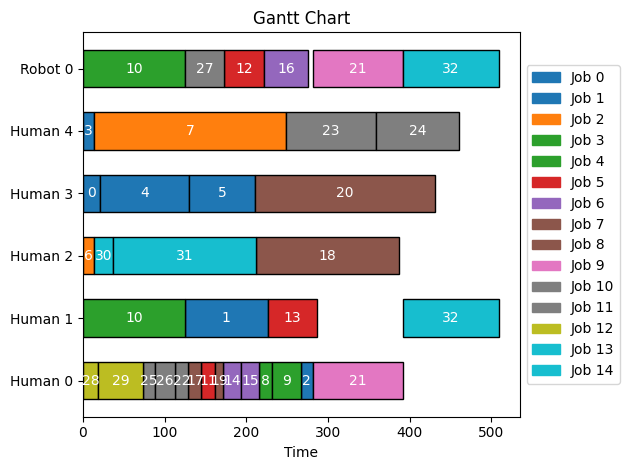

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
env = HRCEnv(generator_params=params_H5R1)
td = env.reset(batch_size=[20])
model = torch.load("C:\\Users\\jia\\Desktop\\hrcscheduling\\examples_for_hrc\\models\\L2DModel_H5R1.pth", map_location=torch.device('cpu'))
model.eval()
env.render(td, 1)
# Update plot within a for loop
while not td["done"].all():
    # Clear the previous output for the next iteration
    clear_output(wait=True)

    td = make_step_with_model(td, env, model)
    schedule = env.render(td, 1)
    # Display updated plot
    display(plt.gcf())
    
    # Pause for a moment to see the changes
    # time.sleep(.4)

H5R2

c:\Users\jia\AppData\Local\anaconda3\envs\rlhrc\Lib\site-packages\matplotlib\axes\_axes.py:2316: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  dx = [convert(x0 + ddx) - x for ddx in dx]


<Figure size 640x480 with 0 Axes>

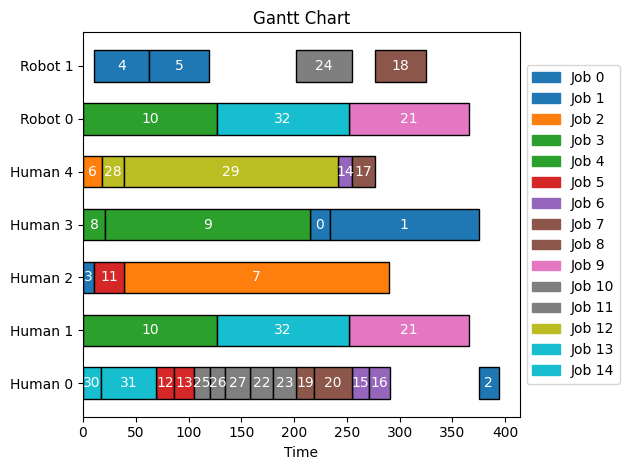

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
env = HRCEnv(generator_params=params_H5R2)
td = env.reset(batch_size=[20])
model = torch.load("C:\\Users\\jia\\Desktop\\hrcscheduling\\examples_for_hrc\\models\\L2DModel_H5R2.pth", map_location=torch.device('cpu'))
model.eval()
env.render(td, 0)
# Update plot within a for loop
while not td["done"].all():
    # Clear the previous output for the next iteration
    clear_output(wait=True)

    td = make_step_with_model(td, env, model)
    schedule = env.render(td, 1)
    # Display updated plot
    display(plt.gcf())
    
    # Pause for a moment to see the changes
    # time.sleep(.4)